<a href="https://colab.research.google.com/github/JSJeong-me/Uniinfo-Machine-Vision/blob/main/Prophet/ENC6/TS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xlrd==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.5 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [2]:
# Python
import pandas as pd
from fbprophet import Prophet

In [3]:
df = pd.read_excel('Total_final2.xls', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
df.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [4]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
df_day.columns

Index(['TS', 'y'], dtype='object')

In [5]:
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [6]:
df_day.tail()

,ds,y
332,2020-03-28,4907.76
333,2020-03-29,4293.60
334,2020-03-30,9195.84
335,2020-03-31,8639.76
336,2020-04-01,44.16


In [7]:
m = Prophet()
m.fit(df_day)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=100) # Forecasting 100 days
future.tail()

,ds
432,2020-07-06
433,2020-07-07
434,2020-07-08
435,2020-07-09
436,2020-07-10


### Modeling Holidays and Special Events

In [9]:
new_year = pd.DataFrame({
  'holiday': 'new_year',
  'ds': pd.to_datetime(['2020-01-24','2020-01-25','2020-01-26', '2020-01-27']),
  'lower_window': 0,
  'upper_window': 1,
})
thanksgiving = pd.DataFrame({
  'holiday': 'thanksgiving',
  'ds': pd.to_datetime(['2019-09-12', '2019-09-13', '2019-09-14', '2019-09-15']),
  'lower_window': 0,
  'upper_window': 1,
})
vacation = pd.DataFrame({
  'holiday': 'vacation',
  'ds': pd.to_datetime(['2019-08-05', '2019-08-06', '2019-08-07', '2020-08-03', '2020-08-04','2020-08-05']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((new_year, thanksgiving, vacation))

In [10]:
m = Prophet(holidays=holidays)
forecast = m.fit(df_day).predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


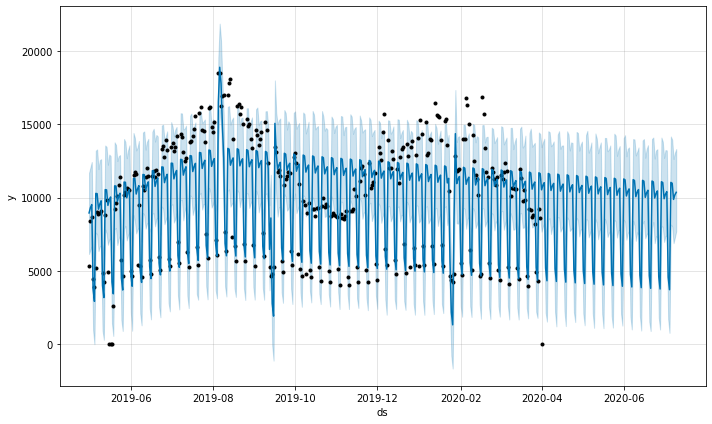

In [11]:
fig = m.plot(forecast)

In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
432,2020-07-06,11044.872638,8244.802730,14139.788762
433,2020-07-07,10985.204270,8266.060902,14120.024338
434,2020-07-08,9882.067809,6962.604387,12612.263848
435,2020-07-09,10195.974029,7293.877017,13028.528948
436,2020-07-10,10368.229811,7600.036945,13432.727348


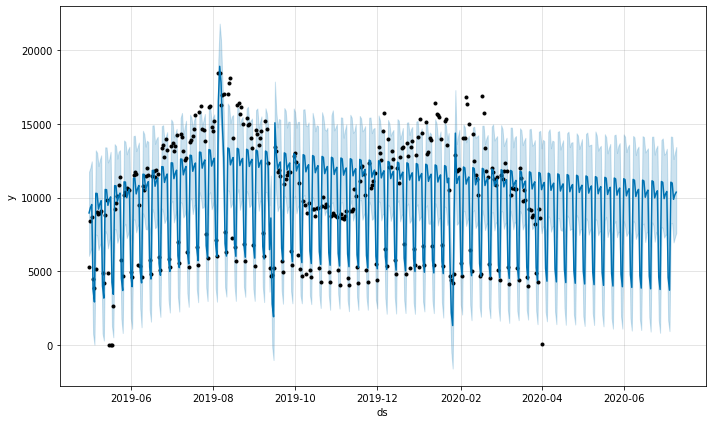

In [13]:
fig1 = m.plot(forecast)

In [14]:
#forecast.to_csv('.\\forecast-prophet.csv')
forecast[(forecast['new_year'] + forecast['thanksgiving'] + forecast['vacation']).abs() > 0][ \
    ['ds', 'new_year', 'thanksgiving', 'vacation']][-15:]

,ds,new_year,thanksgiving,vacation
96,2019-08-05,0.000000,0.00000,3165.207420
97,2019-08-06,0.000000,0.00000,5589.816901
98,2019-08-07,0.000000,0.00000,5589.816901
99,2019-08-08,0.000000,0.00000,2424.609482
134,2019-09-12,0.000000,-5831.00230,0.000000
135,2019-09-13,0.000000,-3855.38138,0.000000
136,2019-09-14,0.000000,-3855.38138,0.000000
137,2019-09-15,0.000000,-3855.38138,0.000000
138,2019-09-16,0.000000,1975.62092,0.000000
268,2020-01-24,-5783.684368,0.00000,0.000000


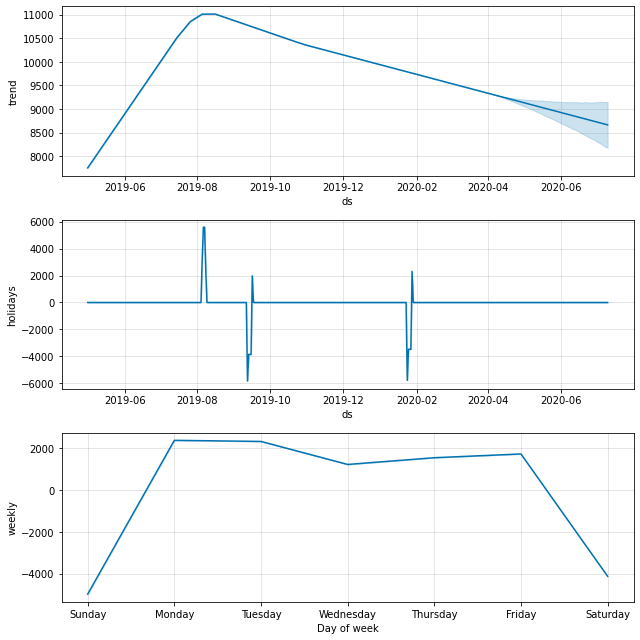

In [15]:
fig2 = m.plot_components(forecast)

In [ ]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)